In [1]:
import numpy as np
import pandas as pd
import random
import skfuzzy as fuzz
import matplotlib.pyplot as plt
mf_num=10

In [2]:
trn = pd.read_excel("trn.xls")
tst = pd.read_excel("tst.xls")
X1_train = trn.iloc[:,0]
X2_train = trn.iloc[:,1]
Y_train = trn.iloc[:,2]
X1_test = tst.iloc[:,0]
X2_test = tst.iloc[:,1]
Y_test = tst.iloc[:,2]

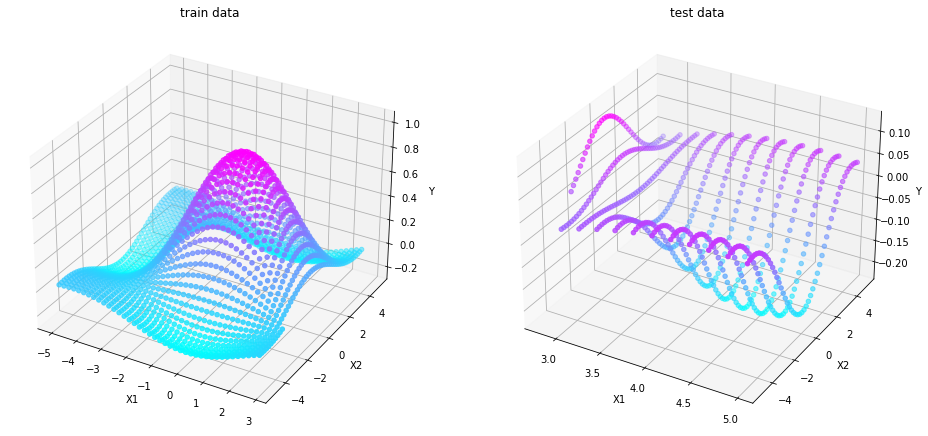

In [3]:
plt.figure(figsize = (16,20)) 

ax1 = plt.subplot(121,projection='3d')
ax1.scatter3D (X1_train , X2_train , Y_train , c = Y_train , cmap ='cool')   
ax1.set_xlabel('X1')  
ax1.set_ylabel('X2')  
ax1.set_zlabel('Y') 
ax1.set_title('train data') 

ax2 = plt.subplot(122,projection='3d')
ax2.scatter3D (X1_test , X2_test , Y_test , c = Y_test , cmap ='cool')   
ax2.set_xlabel('X1')  
ax2.set_ylabel('X2')  
ax2.set_zlabel('Y') 
ax2.set_title('test data')
plt.show()

In [4]:
x_d = np.linspace(-6,6,mf_num+2)
y_d = np.linspace(-2.2,1,mf_num+2)
X1_mfs = []
X2_mfs = []
Y_mfs = []

for i in range(mf_num):
    X1_mfs.append(fuzz.trimf(x_d, [x_d[i],x_d[i+1],x_d[i+2]]))
    X2_mfs.append(fuzz.trimf(x_d, [x_d[i],x_d[i+1],x_d[i+2]]))
    Y_mfs.append(fuzz.trimf(y_d, [y_d[i],y_d[i+1],y_d[i+2]]))

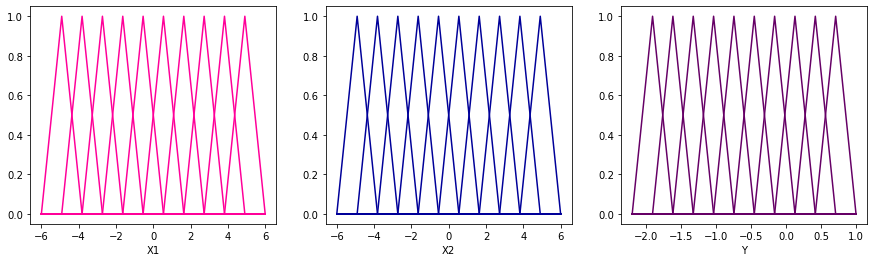

In [5]:
plt.figure(figsize = (15,4))
plt.subplot(131)
for i in (X1_mfs):
    plt.plot(x_d,i,color='#FF0099')
plt.xlabel('X1')
plt.subplot(132)
for i in (X2_mfs):
    plt.plot(x_d,i,color='#000099')
plt.xlabel('X2')
plt.subplot(133)
for i in (Y_mfs):
    plt.plot(y_d,i,color='#660066')
plt.xlabel('Y')
plt.show()

In [6]:
all_rules =[]
for i in range(2000):
    tempX1 = []
    tempX2 = [] 
    tempY = [] 
    for j in range(mf_num): 
        
        tempX1.append(fuzz.interp_membership(x_d,X1_mfs[j],X1_train[i]))         
        tempX2.append(fuzz.interp_membership(x_d,X2_mfs[j],X2_train[i]))       
        tempY.append(fuzz.interp_membership(y_d,Y_mfs[j],Y_train[i]))
           
    degree = tempX1[np.argmax(tempX1)] * tempX2[np.argmax(tempX2)] * tempY[np.argmax(tempY)]    
    all_rules.append([np.argmax(tempX1) , np.argmax(tempX2) , np.argmax(tempY) , degree])

In [23]:
all_rules

[[0, 0, 7, 0.5801616297483971],
 [0, 0, 7, 0.5770163422598168],
 [0, 0, 7, 0.4630151212562692],
 [0, 0, 7, 0.34448540897323765],
 [0, 1, 7, 0.41769006096514366],
 [0, 1, 7, 0.5260608882920786],
 [0, 1, 7, 0.6027036224287767],
 [0, 1, 7, 0.4717838060138109],
 [0, 1, 7, 0.3457252222098151],
 [0, 2, 7, 0.4429098879470944],
 [0, 2, 7, 0.36604297980436795],
 [0, 2, 6, 0.4429098879470944],
 [0, 2, 6, 0.46034476549495884],
 [0, 2, 6, 0.3999010408073709],
 [0, 2, 6, 0.32189262830707094],
 [0, 3, 6, 0.45186811525423265],
 [0, 3, 6, 0.6204410530958067],
 [0, 3, 6, 0.753087062109075],
 [0, 3, 6, 0.6475966321556207],
 [0, 3, 6, 0.5222390681439097],
 [0, 4, 6, 0.5321963021126144],
 [0, 4, 6, 0.68381656146861],
 [0, 4, 6, 0.8216364285896706],
 [0, 4, 6, 0.7310646670096167],
 [0, 4, 6, 0.5681013456687569],
 [0, 5, 6, 0.4150084467045357],
 [0, 5, 6, 0.5696825636165966],
 [0, 5, 6, 0.7327505822015681],
 [0, 5, 6, 0.8202739410426705],
 [0, 5, 6, 0.6824150132406417],
 [0, 5, 6, 0.5303139893008518],
 [0, 

In [7]:
allrules_2 =[]
temp_1=[]
temp_1.append(all_rules[0][0:3])
allrules_2.append(all_rules[0])


In [8]:
# Removing Duplicates
for i in all_rules:
    if i[0:3]not in temp_1:
        temp_1.append(i[0:3])
        allrules_2.append(i)

In [9]:
reduced_rules=[]
reduced_rules.append(allrules_2[0])
temp_2=[]
temp_2.append(allrules_2[0][0:2])

In [10]:
# Removing conflicts
c=0
for i in allrules_2:
    c+=1
    T=2
    if i[0:2] not in temp_2:
        reduced_rules.append(i)
        temp_2.append(i[0:2])
        
#select the bigger degree if new is bigger

    elif i[0:2] in temp_2 :
        x = temp_2.index(i[0:2])        
        if i[3]>= reduced_rules[x][3]:
            reduced_rules[x][3]=i[3]
#select the smaller degree if T is big
        elif i[3]< reduced_rules[x][3]:
            r=random.random()
            p=(i[3]-reduced_rules[x][3])/T
            T=T-1/c
            if p<r:
                reduced_rules[x][3]=i[3]
            
            
        

In [11]:
print(pd.DataFrame(reduced_rules) )

    0  1  2         3
0   0  0  7  0.580162
1   0  1  7  0.417690
2   0  2  7  0.442910
3   0  3  6  0.451868
4   0  4  6  0.532196
.. .. .. ..       ...
75  7  5  8  0.351647
76  7  6  8  0.223181
77  7  7  7  0.261020
78  7  8  6  0.279166
79  7  9  6  0.196443

[80 rows x 4 columns]


In [12]:
reduced_rules = np.array(reduced_rules,dtype=int)
Y_predict = []
temp = np.linspace(-2.2,1,mf_num+2)
temp=np.delete(temp, -1, axis=0)
center=np.delete(temp, 0, axis=0)

In [13]:
for i in range(2000):
    list1 , list2  = [],[]
    A1=0
    A2=0
    for j in range(mf_num):
        list1.append(fuzz.interp_membership(x_d,X1_mfs[j],X1_train[i]))
        list2.append(fuzz.interp_membership(x_d,X2_mfs[j],X2_train[i]))
    
    for s in range(len(reduced_rules)):
        
        A1 += list1[reduced_rules[s][0]] * list2[reduced_rules[s][1]] * center[reduced_rules[s][2]]+0.000000001
        
        A2 += list1[reduced_rules[s][0]] * list2[reduced_rules[s][1]] +0.0001   
 
    Y_predict.append(A1/A2) 

Text(0.5, 0.92, 'Ppredicted train data')

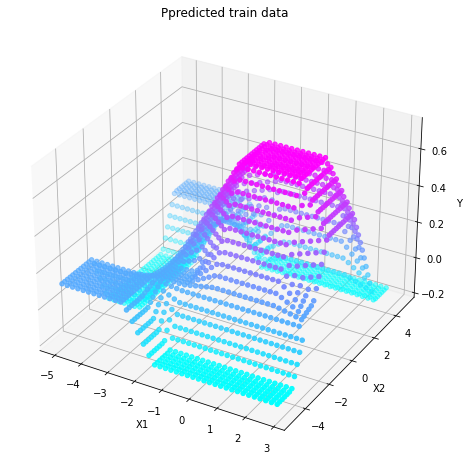

In [14]:
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(projection='3d')
ax.scatter3D (X1_train , X2_train , Y_predict , c = Y_predict , cmap ='cool')  
ax.set_xlabel('X1')  
ax.set_ylabel('X2')  
ax.set_zlabel('Y') 
ax.set_title('Ppredicted train data') 

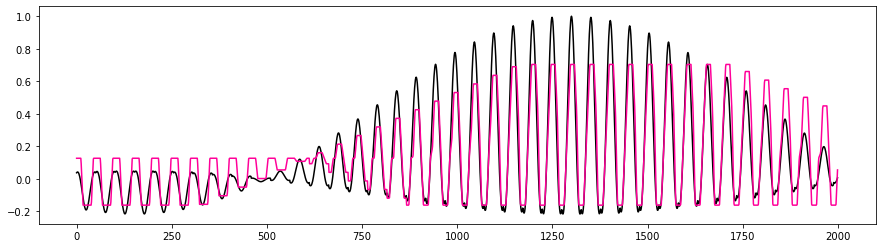

MSE 0.007245860016115621


In [24]:
mse_train = sum((Y_train - Y_predict) **2) / (2*len(Y_train))

# draw plot    
plt.figure(figsize = (15,4))
plt.plot(range(2000),Y_train[0:2000],color= 'black')
plt.plot(range(2000) , Y_predict[0:2000],color='#FF0099')
plt.show()    
print('MSE',mse_train)

In [16]:
reduced_rules = np.array(reduced_rules,dtype=int)
Y_testp = []

for i in range(601):
    
    D1 , D2  = [],[]
    
    for j in range(mf_num):
        D1.append(fuzz.interp_membership(x_d,X1_mfs[j],X1_test[i]))
        D2.append(fuzz.interp_membership(x_d,X2_mfs[j],X2_test[i]))

    A1,A2 = 0,0
    for k in range(len(reduced_rules)):
        
        A1 += D1[reduced_rules[k][0]] * D2[reduced_rules[k][1]] * center[reduced_rules[k][2]]+0.000000001
        
        A2 += D1[reduced_rules[k][0]] * D2[reduced_rules[k][1]]+0.0001

    Y_testp.append(A1/A2)
        

In [18]:

#TESTING 
fuzz.interp_membership(x_d,X1_mfs[7],X1_test[50])

0.7490833333333327

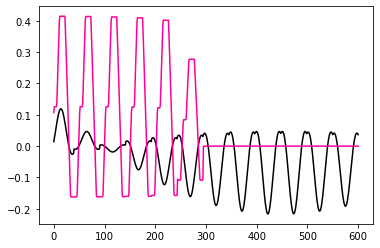

MSE : 0.019940881643440968


In [19]:
MSE_test = sum((Y_test - Y_testp) **2) / (2*len(Y_test))
plt.figure()
plt.plot(range(601),Y_test[0:601],color= 'black')
plt.plot(range(601) , Y_testp[0:601],color='#FF0099')
plt.show() 
print('MSE :',MSE_test)

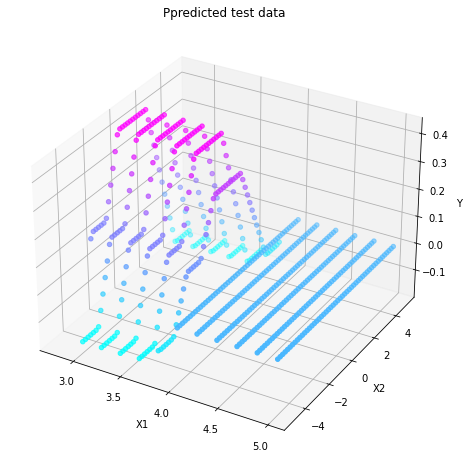

In [25]:
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(projection='3d')
ax.scatter3D (X1_test , X2_test , Y_testp , c = Y_testp , cmap ='cool')  
ax.set_xlabel('X1')  
ax.set_ylabel('X2')  
ax.set_zlabel('Y') 
ax.set_title('Ppredicted test data')
plt.show()